In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib inline

In [105]:
from scipy.stats import skew, kurtosis
from scipy.signal import hilbert

In [411]:
from sklearn.decomposition import PCA
import tqdm

In [4]:
train_df = pd.read_json('train.json')

In [396]:
pd.DataFrame(train_df.values)

,0,1,2,3,4
0,"[[-27.878361, -27.15416, -28.668615, -29.53797...","[[-27.154118, -29.537888, -31.0306, -32.190483...",dfd5f913,43.9239,0
1,"[[-12.242375, -14.920305, -14.920363, -12.6663...","[[-31.506321, -27.984554, -26.645678, -23.7676...",e25388fd,38.1562,0
2,"[[-24.603676, -24.603714, -24.871029, -23.1527...","[[-24.870956, -24.092632, -20.653963, -19.4110...",58b2aaa0,45.2859,1
3,"[[-22.454607, -23.082819, -23.998013, -23.9980...","[[-27.889421, -27.519794, -27.165262, -29.1035...",4cfc3a18,43.8306,0
4,"[[-26.006956, -23.164886, -23.164886, -26.8911...","[[-27.206915, -30.259186, -30.259186, -23.1649...",271f93f4,35.6256,0
5,"[[-20.769371, -20.769434, -25.906025, -25.9060...","[[-29.288746, -29.712593, -28.884804, -28.8848...",b51d18b5,36.9034,1
6,"[[-26.673811, -23.666162, -27.622442, -28.3176...","[[-24.557735, -26.97868, -27.622442, -29.07345...",31da1a04,34.4751,1
7,"[[-24.989119, -27.755224, -25.817074, -24.9892...","[[-27.755173, -26.732174, -28.124943, -31.8377...",56929c16,41.1769,0
8,"[[-17.146641, -17.146572, -17.994583, -19.4455...","[[-25.733608, -24.472507, -24.710424, -22.7721...",525ab75c,35.7829,0
9,"[[-24.020853, -23.551275, -27.18819, -29.12643...","[[-28.702518, -33.563324, -29.571918, -29.1264...",192f56eb,43.3007,0


In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1604 entries, 0 to 1603
Data columns (total 5 columns):
band_1        1604 non-null object
band_2        1604 non-null object
id            1604 non-null object
inc_angle     1604 non-null object
is_iceberg    1604 non-null int64
dtypes: int64(1), object(4)
memory usage: 75.2+ KB


In [393]:
train_df['band_1'] = train_df['band_1'].apply(lambda x: np.array(x).reshape(1,-1))
train_df['band_2'] = train_df['band_2'].apply(lambda x: np.array(x).reshape(1,-1))

In [56]:
def plotimage(df, Id):
    c = ('Boat', 'Iceberg')
    _, a = plt.subplots(2,3)
    a[0][0].imshow(df['band_1'].iloc[Id])
    a[0][1].imshow(df['band_2'].iloc[Id])
    a[0][2].imshow((df['band_1']+df['band_2']).iloc[Id])
    a[1][0].hist(df['band_1'].iloc[Id])
    a[1][1].hist(df['band_2'].iloc[Id])
    a[1][2].hist((df['band_1']+df['band_2']).iloc[Id])
    plt.suptitle(c[df['is_iceberg'].iloc[Id]])

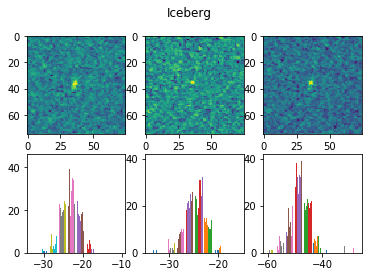

In [59]:
plotimage(train_df, 2)

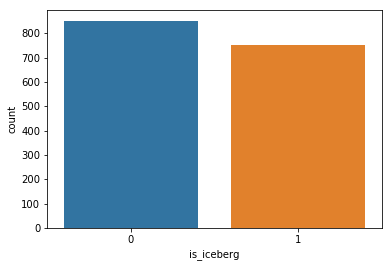

In [16]:
sns.countplot(train_df['is_iceberg'])

# Feature Extraction

......................................................................................................................................................................................................................................

### Variance and mean of band1

In [308]:
var1 = []
m1 = []
for i in train_df['band_1']:
    var1.append(np.var(i))
    m1.append(np.mean(i))

In [309]:
print(skew(var1), skew(m1))
#print(skew(np.log(var1)), skew(np.log(m1)))

2.8309530732108263 0.19465608766114492


-0.18694860714122713 -0.9830032474343193


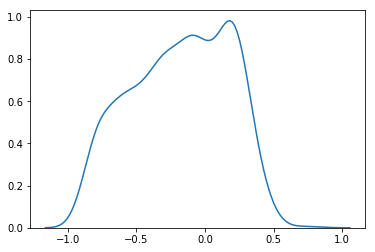

In [322]:
#sns.kdeplot(var1)
#print(skew(np.log(var1)),kurtosis(np.log(var1)))
#print(skew(1/np.array(var1)), kurtosis(1/np.array(var1)))
print(skew((e**(1/np.array(var1)))*6-7), kurtosis((e**(1/np.array(var1)))*6-7))
#sns.kdeplot(np.log(var1)-2)
sns.kdeplot((e**(1/np.array(var1)))*6-7)

0.1946560876611429 -0.34910262604192344


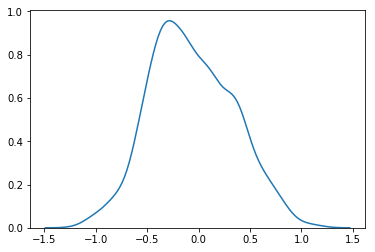

In [329]:
#sns.kdeplot(m1)
#print(skew(np.log(m1)), kurtosis(np.log(m1)))
#print(skew(1/np.array(m1)), kurtosis(1/np.array(m1)))
print(skew(((np.array(m1))/10)), kurtosis(((np.array(m1))/10)))
#print(skew(np.sqrt(1/np.array(m1))), kurtosis(np.sqrt(1/np.array(m1))))
#sns.kdeplot(np.log(m1)-2)
#sns.kdeplot(1/7*np.array(m1)-1)
sns.kdeplot(np.array(m1)/10+2)

In [330]:
var1 = (e**(1/np.array(var1)))*6-7
m1 = np.array(m1)/10+2

......................................................................................................................................................................................................................................

### Varience, Mean of band2

In [331]:
var2 = []
m2 = []
for i in train_df['band_2']:
    var2.append(np.var(i))
    m2.append(np.mean(i))

1.5400036319565844 1.8628310438464126


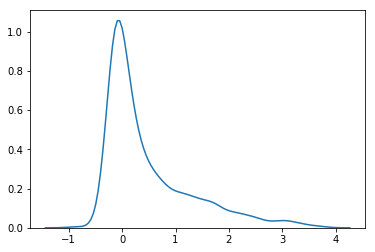

In [188]:
#sns.kdeplot(var1)
#print(skew((e**(1/np.array(var2)))*6-7), kurtosis((e**(1/np.array(var2)))*6-7))
print(skew(1.75*np.log(1/5*np.array(var2))), kurtosis(1.75*np.log(1/5*np.array(var2))))
#sns.kdeplot(np.log(var2)-2)
sns.kdeplot(np.log(1/5*np.array(var2))*1.75)

In [241]:
np.mean(np.log(1/5*np.array(m2))*1.75 - 0.5)

-0.017053931644336849

0.06185774308144841 -0.5217520573825243


0.067517957446442706

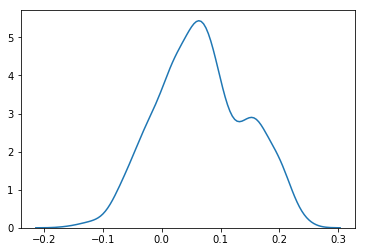

In [345]:
#sns.kdeplot(var1)
print(skew(np.log(-np.array(m2))), kurtosis(np.log(-np.array(m2))))
#print(skew(1.75*np.log(1/5*np.array(m2))), kurtosis(1.75*np.log(1/5*np.array(m2))))
sns.kdeplot(np.log(-np.array(m2))-3.2)
#sns.kdeplot(np.log(1/5*np.array(m2))*1.75)
np.mean(np.log(-np.array(m2))-3.2)

In [346]:
m2 = np.log(-np.array(m2))-3.2
var2 = np.log(1/5*np.array(var2))*1.75 - 0.5

......................................................................................................................................................................................................................................

### Max, min of band2

In [254]:
max2 = []
min2 = []
for i in train_df['band_2']:
    max2.append(max(i))
    min2.append(min(i))

In [255]:
print(skew(min2), skew(max2))
print(kurtosis(min2), kurtosis(max2))

-0.2644036594638341 0.7047538046049776
-0.30014989127806757 -0.2738855602583965


-0.0031173677369077317

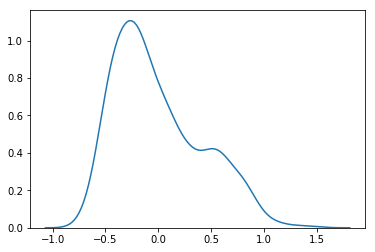

In [256]:
sns.kdeplot((np.array(max2)/20)+0.5)
np.mean((np.array(max2)/20)+0.5)

-0.046530732294264292

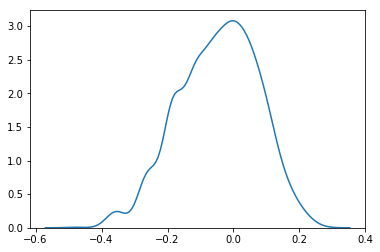

In [257]:
sns.kdeplot((np.array(min2)/20)+1.8)
np.mean((np.array(min2)/20)+1.8)

In [258]:
min2 = (np.array(min2)/20)+1.8
max2 = (np.array(max2)/20)+0.5

......................................................................................................................................................................................................................................

### Max, min of band1

In [277]:
max1 = []
min1 = []
for i in train_df['band_1']:
    max1.append(max(i))
    min1.append(min(i))

In [260]:
print(skew(min1), skew(max1))
print(kurtosis(min1), kurtosis(max1))

0.05553983868903089 0.6459955657956542
-0.2085820774011582 -0.05723645573038194


0.089093280268079791

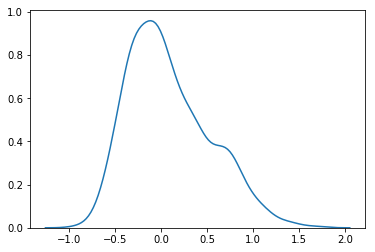

In [278]:
sns.kdeplot(np.array(max1)/20)
np.mean(np.array(max1)/20)

-0.038694942955112131

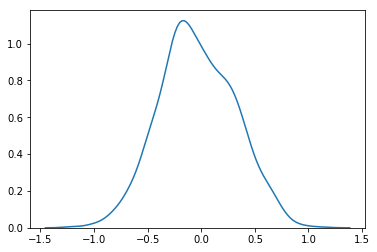

In [279]:
sns.kdeplot(np.array(min1)/12+2.6)
np.mean(np.array(min1)/12+2.6)

In [280]:
min1 = np.array(min1)/12+2.6
max1 = np.array(max1)/20

......................................................................................................................................................................................................................................

## Combining features

In [456]:
temp = pd.DataFrame()

In [457]:
temp['max_band1'] = max1
temp['max_band2'] = max2
temp['min_band1'] = min1
temp['min_band2'] = min2
temp['var_band1'] = var1
temp['var_band2'] = var2
temp['mean_band1'] = m1
temp['mean_band2'] = m2
#temp['is_iceberg'] = train_df['is_iceberg']

In [421]:
band1 = []
for i in tqdm.tqdm(train_df['band_1']):
    band1 = np.append(band1, i[0])
band1 = band1.reshape(1604, 5625)

100%|██████████| 1604/1604 [00:22<00:00, 71.58it/s] 


In [424]:
band2 = []
for i in tqdm.tqdm(train_df['band_2']):
    band2 = np.append(band2, i[0])
band2 = np.array(band2).reshape(1604, 5625)

100%|██████████| 1604/1604 [00:22<00:00, 71.20it/s] 


In [425]:
pca1 = PCA(n_components = 30)
pca1.fit(band1)
pcadata1 = pca1.transform(band1)

In [427]:
pca2 = PCA(n_components = 30)
pca2.fit(band2)
pcadata2 = pca2.transform(band2)

In [458]:
temp = np.append(temp,pcadata1,1)
temp = np.append(temp,pcadata2,1)

(1604, 68)

# Model

In [469]:
import sys
sys.path.append('~/xgboost')

import xgboost as xgb
#from xgboost.sklearn import XGBClassifier

ImportError: No module named 'xgboost'